In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(style='white', rc={'figure.figsize':(20,10)})
sns.set_palette("Set2")
#sns.palplot(sns.color_palette("husl", 8))

In [0]:
# at least 3 features 

In [3]:
df = pd.read_csv('credit_card_clustering.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [7]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [44]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

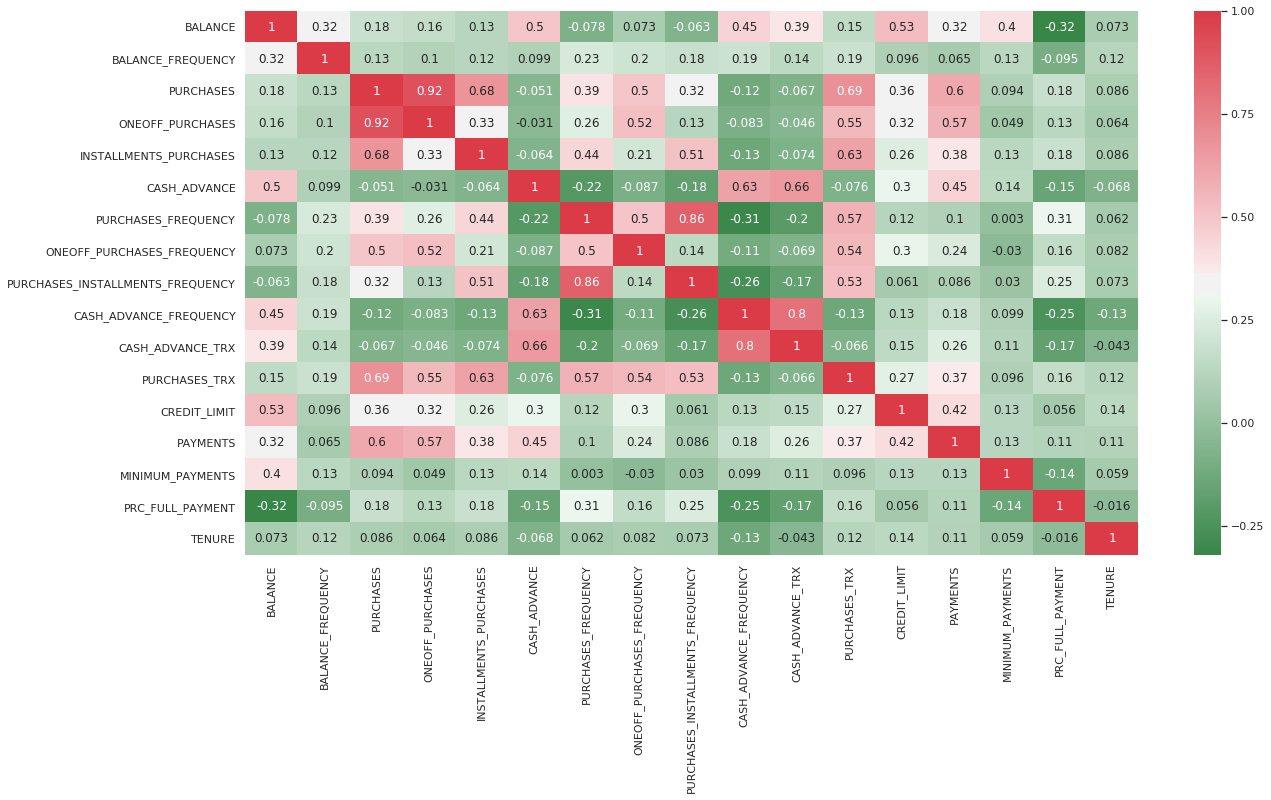

In [21]:
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(133, 10, as_cmap=True))

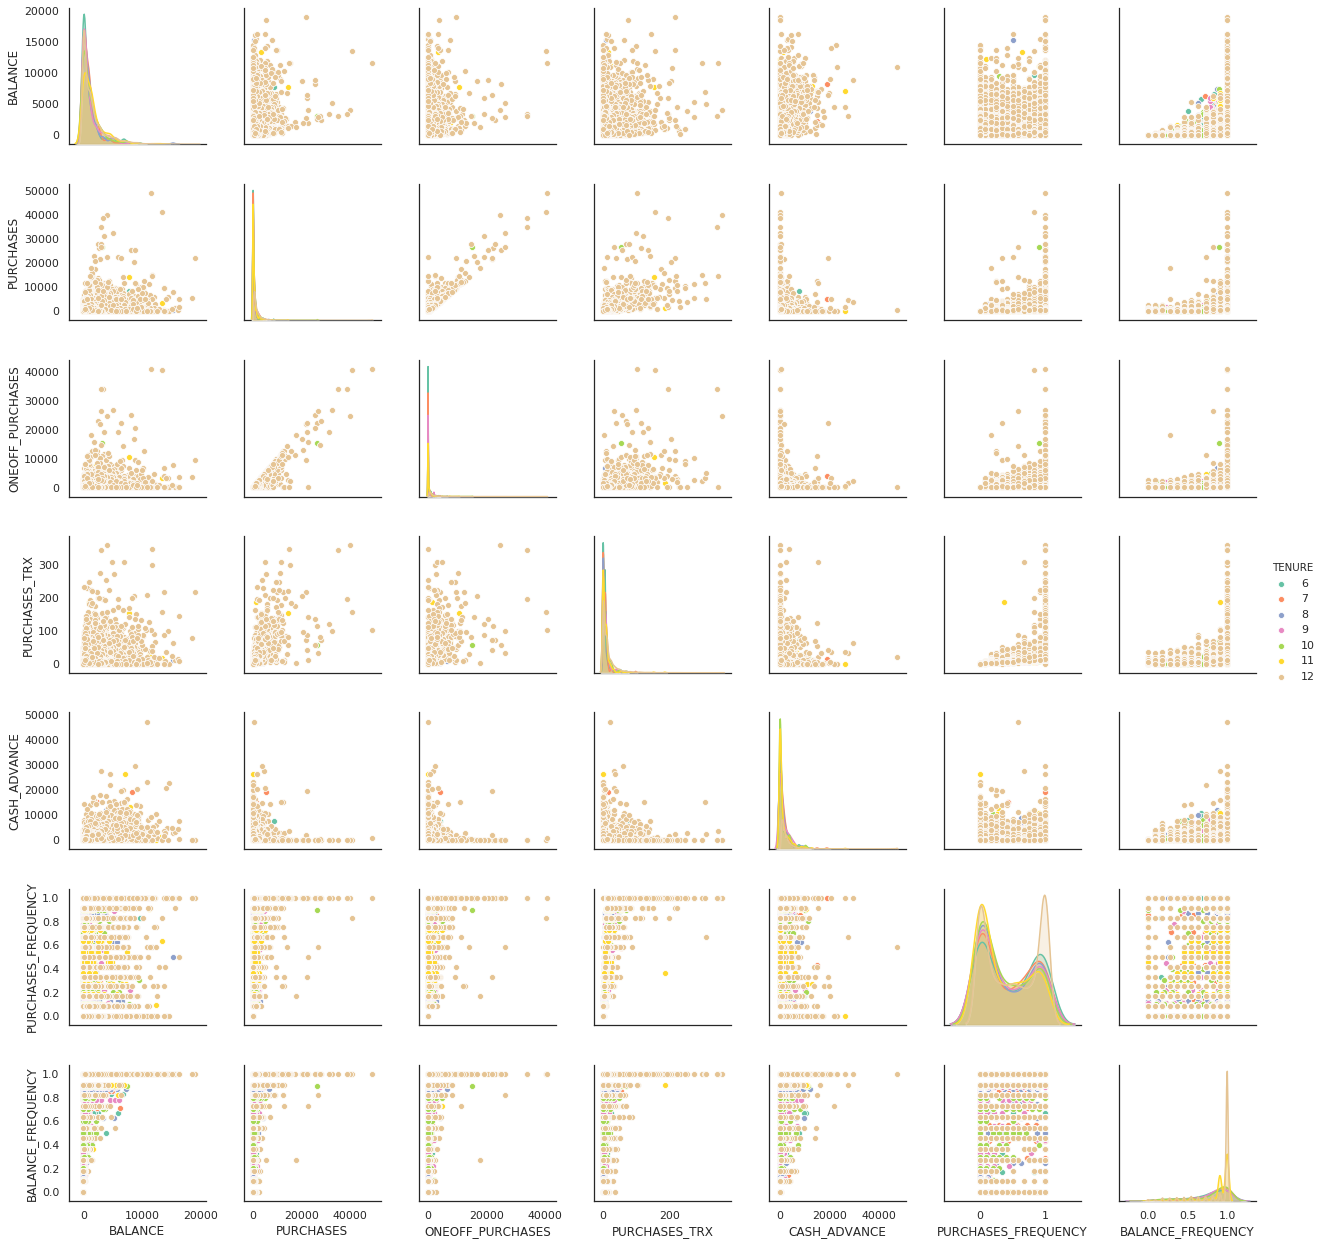

In [66]:
sns.pairplot(df, vars=['BALANCE','PURCHASES','ONEOFF_PURCHASES','PURCHASES_TRX','CASH_ADVANCE','PURCHASES_FREQUENCY','BALANCE_FREQUENCY'],hue='TENURE')

In [40]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

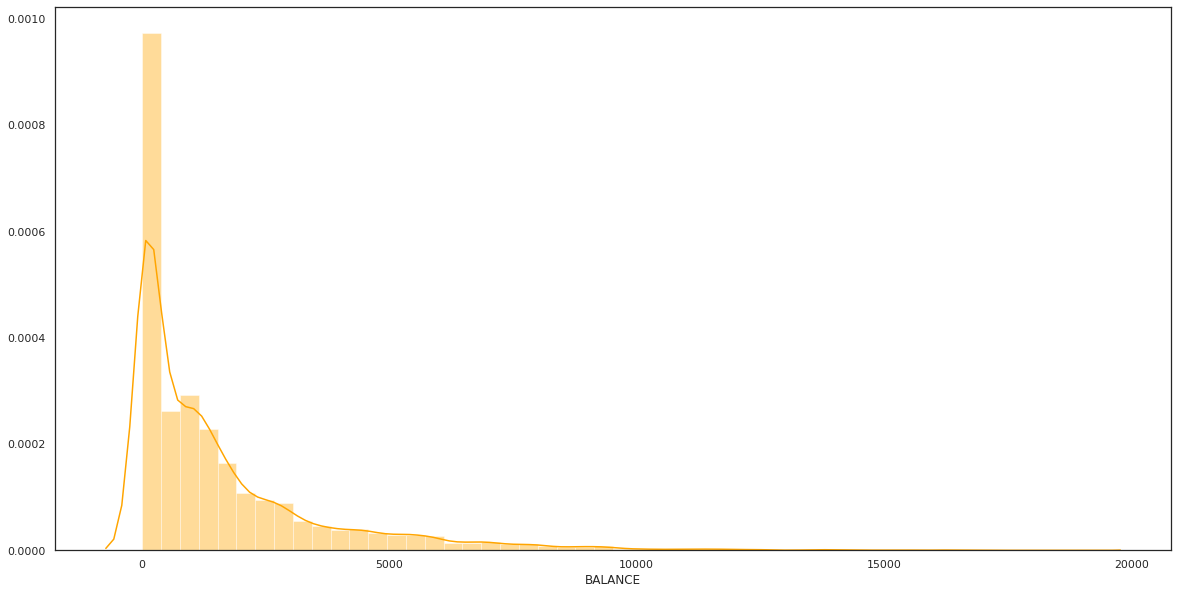

In [28]:
sns.distplot(df['BALANCE'],color='Orange')

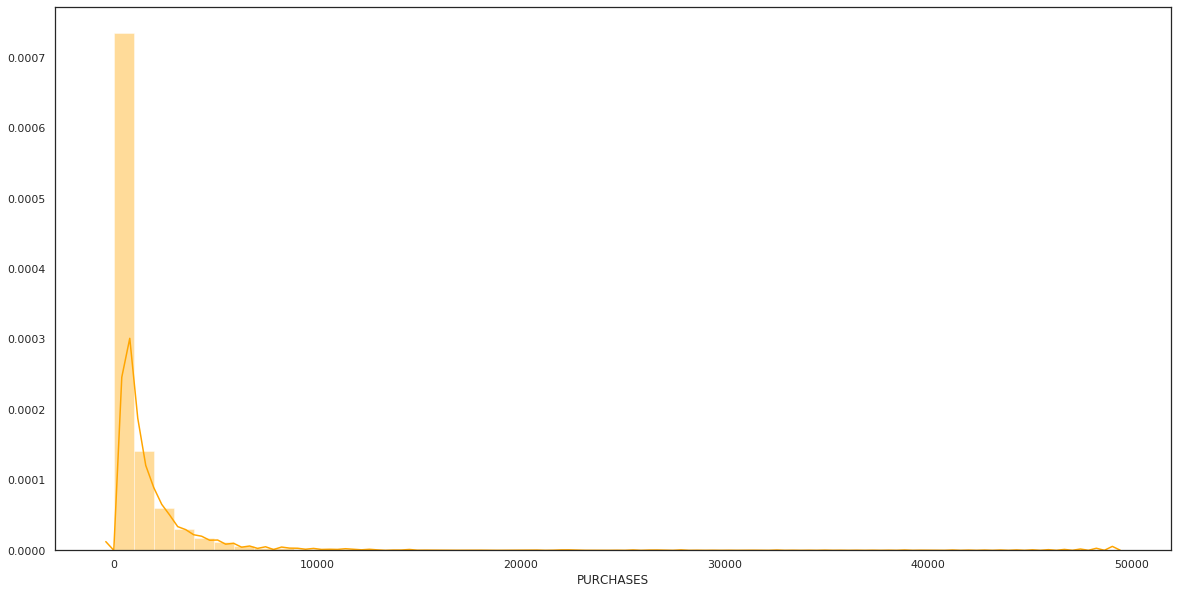

In [88]:
sns.distplot(df['PURCHASES'].dropna(),color='Orange')
#sns.scatterplot(data=df,x='')

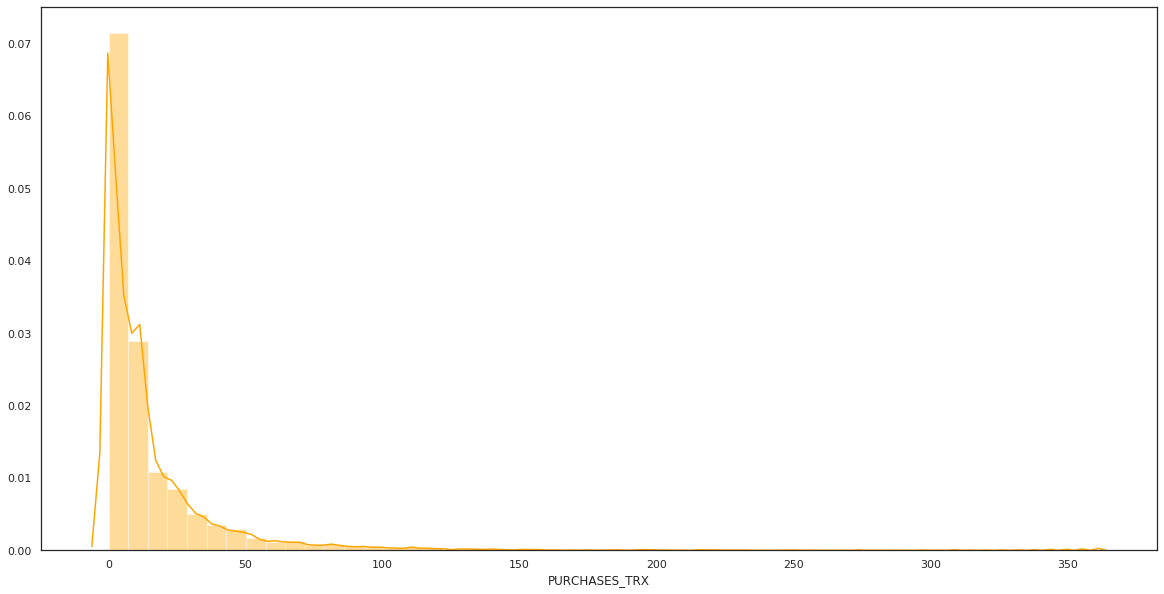

In [112]:
sns.distplot(df['PURCHASES_TRX'].dropna(),color='Orange')
#sns.scatterplot(data=df,x='')

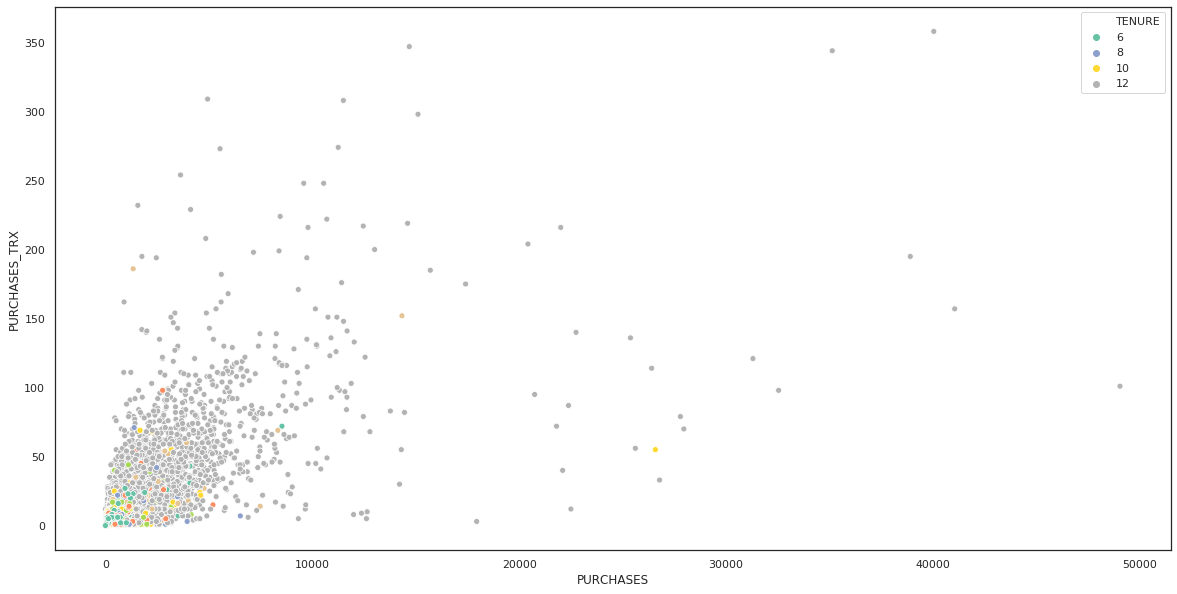

In [109]:
sns.scatterplot(data=df,x='PURCHASES', y='PURCHASES_TRX',hue='TENURE',palette='Set2')

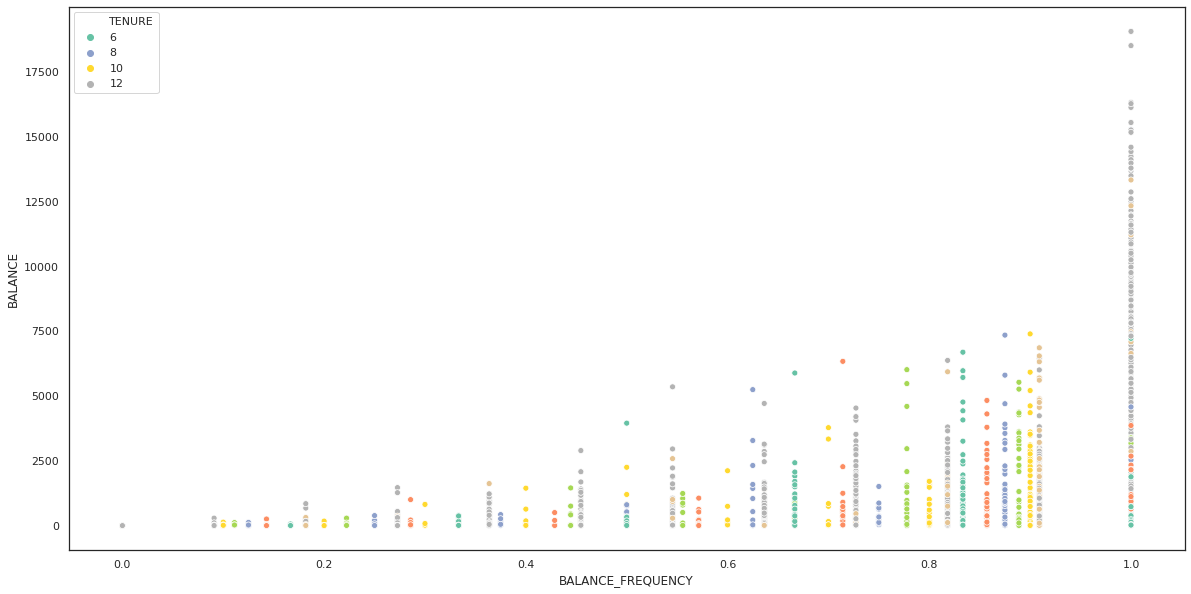

In [53]:
sns.scatterplot(data=df,x='BALANCE_FREQUENCY', y='BALANCE',hue='TENURE',palette='Set2')

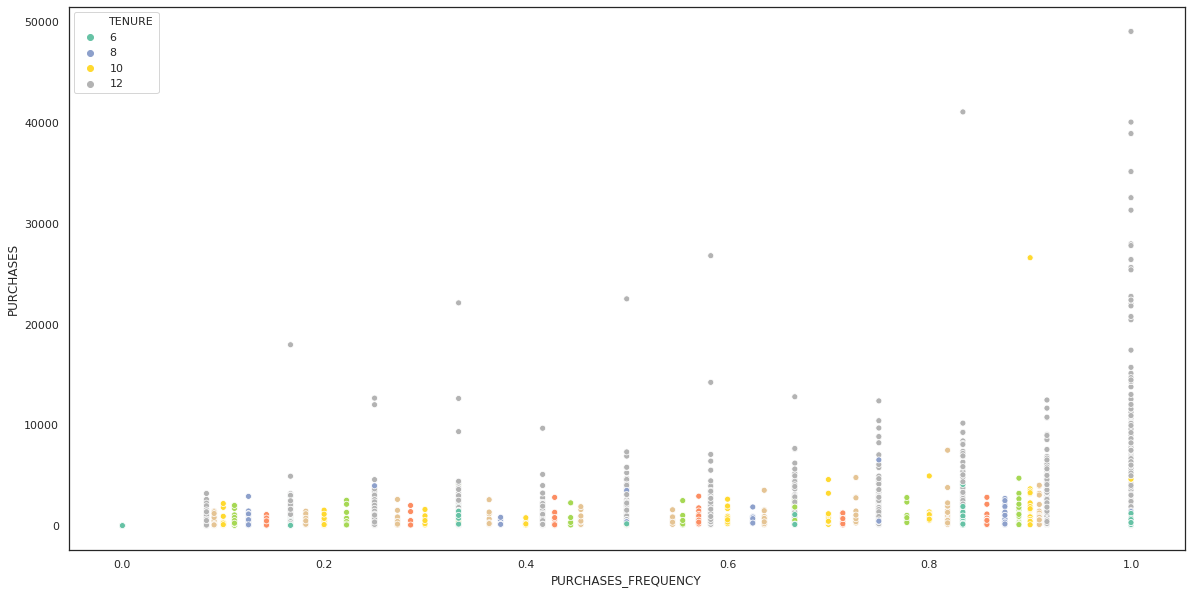

In [67]:
sns.scatterplot(data=df,x='PURCHASES_FREQUENCY', y='PURCHASES',hue='TENURE',palette='Set2')

In [0]:
##CLUSTERING

from sklearn.cluster import KMeans

In [113]:
features = ['PURCHASES','BALANCE','PRC_FULL_PAYMENT']
X = df[features]

X_raw = X
#X_raw['TENURE'] = X_raw['TENURE'].apply(str)
#X = pd.get_dummies(X_raw)
X.head()

,PURCHASES,BALANCE,PRC_FULL_PAYMENT
0,95.40,40.900749,0.000000
1,0.00,3202.467416,0.222222
2,773.17,2495.148862,0.000000
3,1499.00,1666.670542,0.000000
4,16.00,817.714335,0.000000


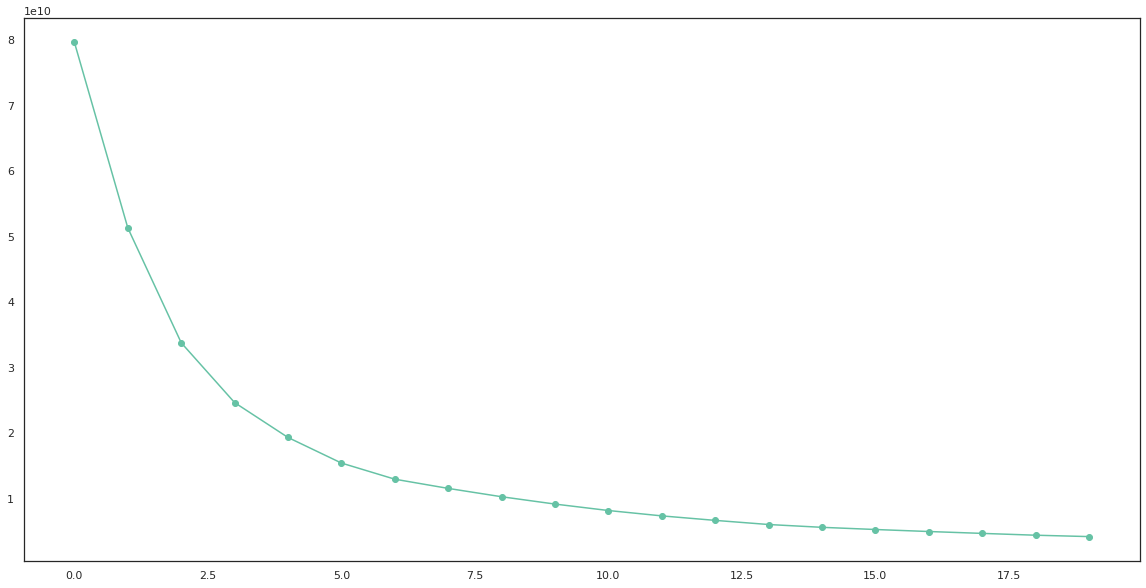

In [114]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
  km = KMeans(n_clusters=num_iter, random_state=42)
  km.fit(X)
  squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

In [0]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters = 5, random_state = 42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
new_data['labels'] = labels

In [116]:
new_data.head(10)

,PURCHASES,BALANCE,PRC_FULL_PAYMENT,labels
0,95.40,40.900749,0.000000,0
1,0.00,3202.467416,0.222222,3
2,773.17,2495.148862,0.000000,3
3,1499.00,1666.670542,0.000000,0
4,16.00,817.714335,0.000000,0
5,1333.28,1809.828751,0.000000,3
6,7091.01,627.260806,1.000000,4
7,436.20,1823.652743,0.000000,3
8,861.49,1014.926473,0.000000,0
9,1281.60,152.225975,0.000000,0


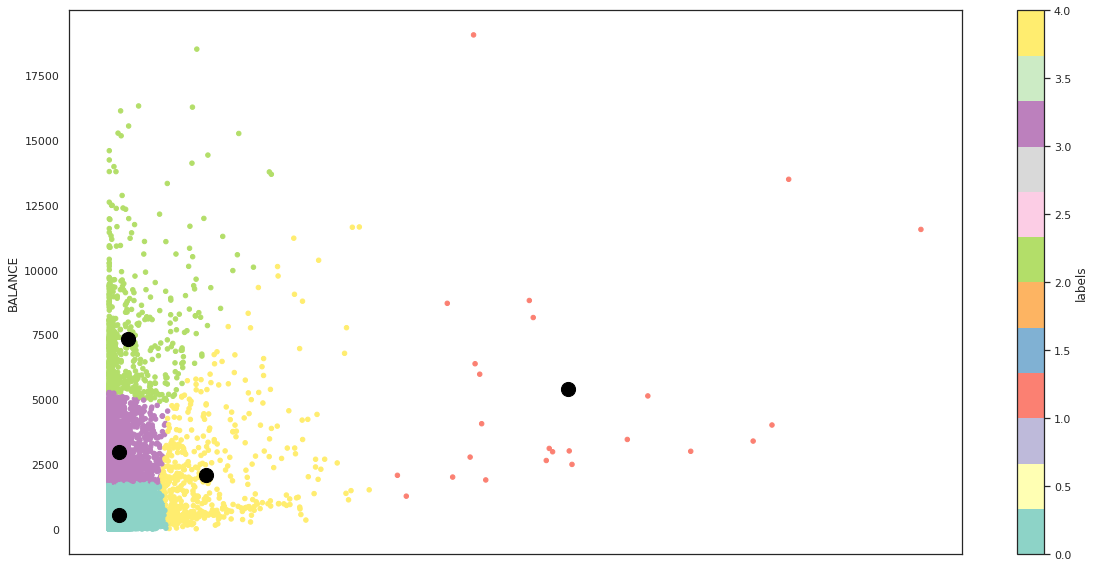

In [117]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='PURCHASES', 
                      y='BALANCE', 
                      c='labels', 
                      cmap='Set3',
                      figsize=(20, 10))

# Get cluster centers
centers = km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

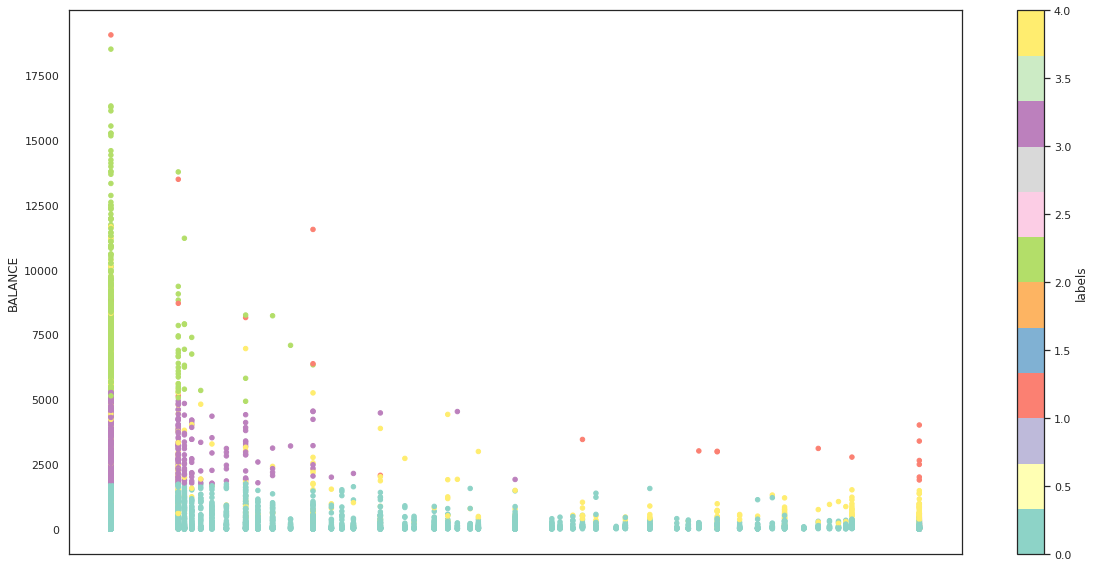

In [122]:
# Plot data points and colorize based on label
new_data.plot.scatter(x='PRC_FULL_PAYMENT', 
                      y='BALANCE', 
                      c='labels', 
                      cmap='Set3',
                      figsize=(20, 10))


In [108]:
# Cluster 0 TEAL
# THE NORMALLY BEHAVING 99%
# LOW EARNING, LOW SPENDING, UNIFORM CREDIT
cluster_0 = new_data[new_data['labels']==0]
cluster_0.describe()

,PURCHASES,BALANCE,PURCHASES_TRX,labels
count,6077.000000,6077.000000,6077.000000,6077.0
mean,605.741848,531.174959,10.766003,0.0
std,731.863047,535.029390,13.922013,0.0
min,0.000000,0.000000,0.000000,0.0
25%,61.710000,55.681483,1.000000,0.0
50%,332.740000,299.531528,7.000000,0.0
75%,863.970000,987.102704,14.000000,0.0
max,3520.000000,1765.502751,232.000000,0.0


In [0]:
# Cluster 1 RED
# EXTREME SHOPAHOLICS, LOVE CREDIT CARDS
cluster_1 = new_data[new_data['labels']==1]
cluster_1.describe()

In [0]:
# Cluster 2 GREEN
# UPPERCLASS TAMAD TO PAY IN FULL
cluster_2 = new_data[new_data['labels']==2]
cluster_2.describe()

In [0]:
# Cluster 3 PURPLE
# MIDDLECLASS LESS TAMAD BUT STILL TAMAD
cluster_3 = new_data[new_data['labels']==3]
cluster_3.describe()

In [0]:
# Cluster 4 YELLOW
# INCOMING SHOPAHOLICS OF ALL CLASSES, TARGET THEM FOR PROMOS!!!!
cluster_4 = new_data[new_data['labels']==4]
cluster_4.describe()